# Recommandations

In [ ]:
!pip install fairbench

In [1]:
import fairbench as fb

In [2]:
test, y, scores = fb.demos.adult(predict="probabilities")
yhat = scores>0.5

In [3]:
test.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [6]:
scores

array([0.00594196, 0.15368347, 0.40081153, ..., 0.72996672, 0.12928268,
       0.84687   ])

In [10]:
sensitive = fb.Fork(fb.categories@test[8], fb.categories@test[9]).intersectional()
sensitive

Male,[1 1 1 ... 1 1 1]
Female,[0 0 0 ... 0 0 0]
Black,[1 0 0 ... 0 0 0]
Black&Male,[1 0 0 ... 0 0 0]
Black&Female,[0 0 0 ... 0 0 0]
Amer-Indian-Eskimo,[0 0 0 ... 0 0 0]
Amer-Indian-Eskimo&Male,[0 0 0 ... 0 0 0]
Amer-Indian-Eskimo&Female,[0 0 0 ... 0 0 0]
White,[0 1 1 ... 1 0 1]
White&Male,[0 1 1 ... 1 0 1]
White&Female,[0 0 0 ... 0 0 0]


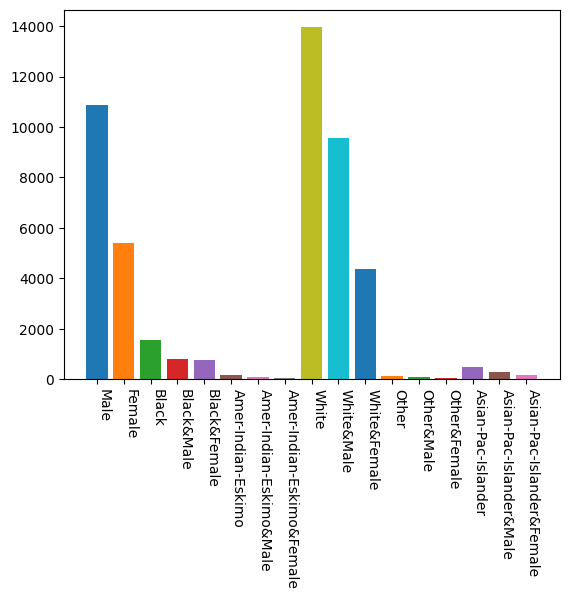

In [12]:
fb.visualize(sensitive.sum())

In [15]:
fb.reduce(fb.accuracy(predictions=yhat, labels=y, sensitive=sensitive), fb.min)

min,0.790


In [23]:
report = fb.multireport(predictions=yhat, scores=scores, labels=y, sensitive=sensitive)
report

accuracy,0.790
pr,0.000
tpr,0.000
tnr,0.847
auc,0.849
avgscore,0.058
tophr,0.333
toprec,0.001
avghr,0.167
avgrepr,0.000
accuracy,0.837


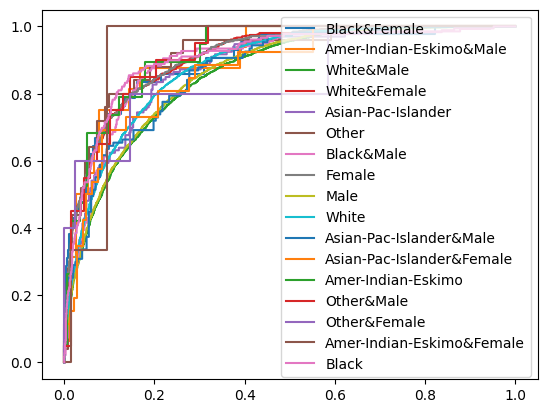

In [28]:
fb.visualize(report.auc.maxbarea.explain.explain.curve)

In [29]:
fb.interactive(report)

Loading BokehJS ...

In [30]:
report.tpr.explain.maxdiff.explain.true_positives

Black&Female,16.0
Amer-Indian-Eskimo&Male,5.0
White&Male,1795.0
White&Female,172.0
Asian-Pac-Islander,82.0
Other,6.0
Black&Male,57.0
Female,199.0
Male,1934.0
White,1967.0
Asian-Pac-Islander&Male,73.0


In [32]:
fb.stamps.available()

('four_fifths',
 'accuracy',
 'prule',
 'dfpr',
 'dfnr',
 'auc',
 'abroca',
 'rbroca',
 'maxbdcg')

In [34]:
stamps = fb.combine(fb.stamps.abroca(report), fb.stamps.four_fifths(report))
stamps

abroca,0.133
4/5 rule,False


In [35]:
fb.modelcards.tohtml(stamps, show=True)

'<h2>Factors</h2><ul><li>The groups that are considered for fairness assessment are Amer-Indian-Eskimo, Amer-Indian-Eskimo&Female, Amer-Indian-Eskimo&Male, Asian-Pac-Islander, Asian-Pac-Islander&Female, Asian-Pac-Islander&Male, Black, Black&Female, Black&Male, Female, Male, Other, Other&Female, Other&Male, White, White&Female, White&Male.</li></ul><h2>Metrics</h2><ul><li>Fairness-aware metrics are computed. The <em>abroca</em> compares the area between ROC curves. This comparison is made between each pair of groups and is a type of disparate mistreatment for recommendation systems. The <em>4/5 rule</em> checks whether the fraction of positive predictions for each protected group is at worst four fifths that of any other group (i.e., the p-rule is 0.8 or greater for any pairwise group comparison). </li></ul>\n<h2>Evaluation Results</h2>\n<table>\n<tr><th>Metric</th><th>Value</th></tr>\n<tr><td>abroca</td><td>0.133</td></tr>\n<tr><td>4/5 rule</td><td>&#10060;</td></tr>\n</table><h2>Cavea